## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import sagemaker
import boto3
import seaborn as sns 
sns.set()
sns.set_style("white")
sns.set_context("paper")
sns.set_palette("Set2")
import matplotlib.pyplot as plt 

In [2]:
from IPython.display import display, HTML
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

## Import sagemaker files

In [3]:
import sagemaker
import boto3

## Set default bucket

In [4]:
client = boto3.client('s3')

## Set Path to get files

In [5]:
path_A = 'new_missforest_imputed_A.csv'
path_B = 'new_missforest_imputed_B.csv'

## Create Dataframes

In [6]:
df1 = pd.read_csv(path_A)
df2 = pd.read_csv(path_B)

## To display all columns in a dataframe

In [7]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# Training Set A

In [8]:
df1.head(5)

,HR,O2Sat,Temp,SBP,DBP,Resp,Age,Gender,ICULOS,SepsisLabel,Patient_ID
0,76.9,97.3,36.24,117.5,73.7,54.0,19,83,0,1,0
1,97.0,95.0,36.30,98.0,75.3,64.0,19,83,0,2,0
2,89.0,99.0,36.57,122.0,86.0,68.0,22,83,0,3,0
3,90.0,95.0,36.70,104.7,66.2,47.8,30,83,0,4,0
4,103.0,88.5,36.16,122.0,91.3,76.0,24,83,0,5,0


### To check the data types

In [9]:
df1.dtypes

HR             float64
O2Sat          float64
Temp           float64
SBP            float64
DBP            float64
Resp           float64
Age              int64
Gender           int64
ICULOS           int64
SepsisLabel      int64
Patient_ID       int64
dtype: object

### To check complete info of dataframe

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790215 entries, 0 to 790214
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   HR           790215 non-null  float64
 1   O2Sat        790215 non-null  float64
 2   Temp         790215 non-null  float64
 3   SBP          790215 non-null  float64
 4   DBP          790215 non-null  float64
 5   Resp         790215 non-null  float64
 6   Age          790215 non-null  int64  
 7   Gender       790215 non-null  int64  
 8   ICULOS       790215 non-null  int64  
 9   SepsisLabel  790215 non-null  int64  
 10  Patient_ID   790215 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 66.3 MB


### To check basic statistical details

In [11]:
df1.describe()

,HR,O2Sat,Temp,SBP,DBP,Resp,Age,Gender,ICULOS,SepsisLabel,Patient_ID
count,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000,790215.000000
mean,84.968693,97.239299,36.997929,120.298619,78.819470,58.970035,18.687445,62.519907,0.577721,27.198518,0.021685
std,16.472670,2.757993,0.531683,20.968528,14.564169,13.076107,5.174115,16.135395,0.493923,28.190940,0.145654
min,20.000000,20.000000,20.900000,22.000000,20.000000,-42.500000,1.000000,18.000000,0.000000,1.000000,0.000000
25%,73.600000,96.000000,36.730000,105.000000,69.000000,50.600000,15.000000,52.000000,0.000000,11.000000,0.000000
50%,84.000000,97.600000,37.000000,118.000000,77.000000,58.000000,18.000000,65.000000,1.000000,21.000000,0.000000
75%,95.000000,99.000000,37.260000,133.000000,87.000000,66.000000,21.000000,75.000000,1.000000,35.000000,0.000000
max,280.000000,100.000000,42.220000,281.000000,300.000000,351.500000,69.000000,89.000000,1.000000,336.000000,1.000000


### To check total null values in dataframe columns (In Descending Order)

In [12]:
df1.isnull().sum().sort_values(ascending = False)

Patient_ID     0
SepsisLabel    0
ICULOS         0
Gender         0
Age            0
Resp           0
DBP            0
SBP            0
Temp           0
O2Sat          0
HR             0
dtype: int64

### Visualizing Missing values using Heat Map

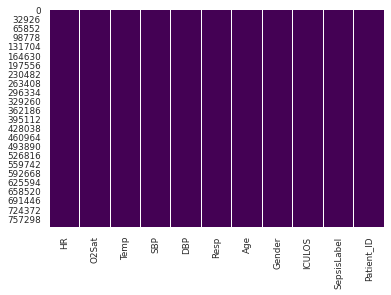

In [13]:
ax = sns.heatmap(df1.isnull(), cbar = False, cmap = 'viridis')

### To calculate percentage of Null values in each column of dataframe

In [14]:
per_A = df1.isna().mean().round(4) * 100

In [15]:
per_A

HR             0.0
O2Sat          0.0
Temp           0.0
SBP            0.0
DBP            0.0
Resp           0.0
Age            0.0
Gender         0.0
ICULOS         0.0
SepsisLabel    0.0
Patient_ID     0.0
dtype: float64

### To delete those columns having NaN percentage greater than 70%

In [16]:
for k, v in per_A.items():
    if v >= 70:
        del per_A[k]

In [17]:
per_A

HR             0.0
O2Sat          0.0
Temp           0.0
SBP            0.0
DBP            0.0
Resp           0.0
Age            0.0
Gender         0.0
ICULOS         0.0
SepsisLabel    0.0
Patient_ID     0.0
dtype: float64

### Graphical representation of NaN percentage (where NaN % > 0)

No handles with labels found to put in legend.


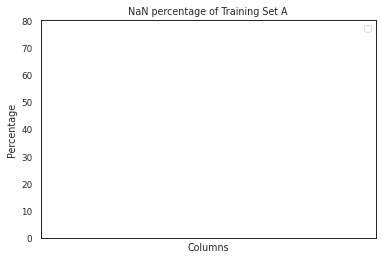

In [20]:
f, ax = plt.subplots()
for i,item in enumerate(zip(per_A.keys(), per_A.values)):
    if (item[1] > 0):
        ax.bar(item[0], item[1], label = item[0])
        ax.text(i - 0.30, item[1] + 1.5 , str(np.round(item[1],2)))    
ax.set_xticklabels([]) 
ax.set_xticks([]) 
plt.title('NaN percentage of Training Set A')
plt.ylim(0,80)
plt.ylabel('Percentage')
plt.xlabel('Columns')
plt.legend(loc='best')
plt.show()

### Creating new dataframe with desired columns | Alternate way of dropping columns

In [22]:
df_1 = df1.copy()

In [23]:
print('There are {} rows and {} columns in New Dataframe'.format(df_1.shape[0], df_1.shape[1]))

There are 790215 rows and 11 columns in New Dataframe


In [24]:
df_1.tail(5)

,HR,O2Sat,Temp,SBP,DBP,Resp,Age,Gender,ICULOS,SepsisLabel,Patient_ID
790210,88.0,98.0,37.11,135.0,81.0,64.0,16,62,1,31,1
790211,96.0,98.0,38.72,174.0,97.0,72.0,16,62,1,32,1
790212,140.0,97.0,37.69,133.0,81.5,62.5,16,62,1,33,1
790213,120.0,96.0,36.96,154.0,118.0,105.0,16,62,1,34,1
790214,115.0,95.0,36.86,150.0,117.0,104.0,16,62,1,35,1


### Check Correlation between columns

Text(0.5, 1.0, 'Correlation after NaN values imputation in Training Set A')

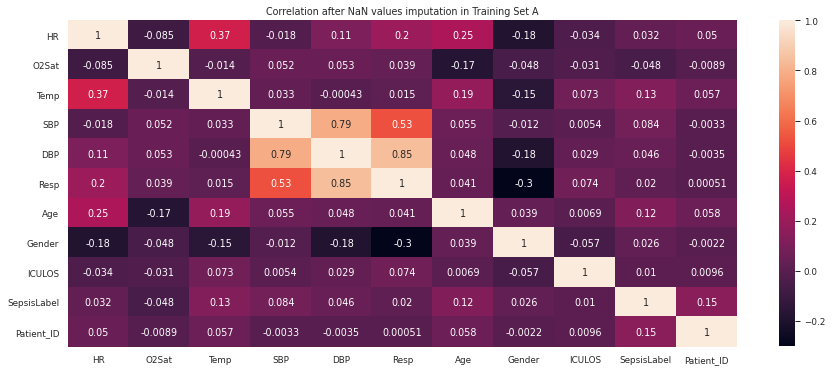

In [40]:
corr = df_1.corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr, annot=True)
plt.title('Correlation after NaN values imputation in Training Set A')

## To check outliers in the vital signs

In [58]:
box_df_1 = df_1.copy() 

In [55]:
box_df_1.head()

,HR,O2Sat,Temp,SBP,DBP,Resp,Age,Gender,ICULOS,SepsisLabel,Patient_ID
0,76.9,97.3,36.24,117.5,73.7,54.0,19,83,0,1,0
1,97.0,95.0,36.30,98.0,75.3,64.0,19,83,0,2,0
2,89.0,99.0,36.57,122.0,86.0,68.0,22,83,0,3,0
3,90.0,95.0,36.70,104.7,66.2,47.8,30,83,0,4,0
4,103.0,88.5,36.16,122.0,91.3,76.0,24,83,0,5,0


### 1. Using Interactive Box Plot

In [107]:
fig = go.Figure()

for col in box_df_1:
  fig.add_trace(go.Box(y=box_df_1[col].values, name=box_df_1[col].name))

fig.update_layout(
    title={
        'text': "Box Plot of Training Set A",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="Vitals", yaxis_title="Count", legend_title="Columns")  
fig.write_html('Box_A.html', auto_open=True)

In [30]:
# Uncomment to show the graph within notebook
# HTML(filename='Box_A.html')

In [59]:
box_df_1.drop(['Age', 'Gender', 'ICULOS', 'SepsisLabel', 'Patient_ID'], axis=1, inplace=True)

### 2. Using Box Plot

Text(0, 0.5, 'Count')

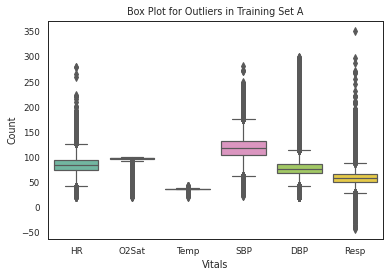

In [60]:
ax = sns.boxplot(data=box_df_1)
ax.set_title('Box Plot for Outliers in Training Set A')
ax.set_xlabel('Vitals')
ax.set_ylabel('Count')

### 3. Using Boxenplot 

Text(0, 0.5, 'Count')

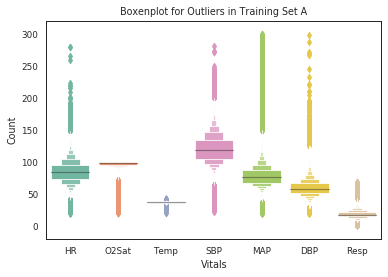

In [110]:
ax = sns.boxenplot(data=box_df_1)
ax.set_title('Boxenplot for Outliers in Training Set A')
ax.set_xlabel('Vitals')
ax.set_ylabel('Count')

### 4. Box Plots based on Sepsis Label 0 and 1 in Training Set A

In [192]:
A_box_0 = df_1.loc[df_1['SepsisLabel']==0]

In [193]:
A_box_0.head(5)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,ICULOS,SepsisLabel,Patient_iD
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83,0,1,0,0
1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,83,0,2,0,0
2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,83,0,3,0,0
3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,83,0,4,0,0
4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,83,0,5,0,0


In [208]:
# As the data frame is created only for those entries where sepsis label = 0,
# so, we don't need SepsisLabel colomn in box plot. Also we will focus only on 
# vitals sign for now. So, we'll drop the rest columns.

In [194]:
A_box_0.drop(['Age', 'Gender', 'ICULOS', 'SepsisLabel', 'Patient_iD'], axis=1, inplace=True)

In [195]:
A_box_0.head(5)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,97.0,95.0,NaN,98.0,75.33,NaN,19.0
2,89.0,99.0,NaN,122.0,86.00,NaN,22.0
3,90.0,95.0,NaN,NaN,NaN,NaN,30.0
4,103.0,88.5,NaN,122.0,91.33,NaN,24.5


#### Plotting

Text(0, 0.5, 'Count')

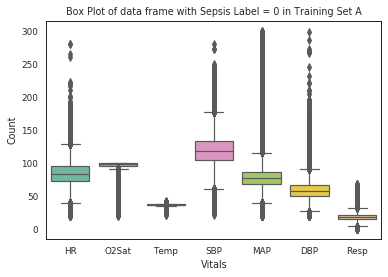

In [196]:
ax = sns.boxplot(data=A_box_0)
ax.set_title('Box Plot of data frame with Sepsis Label = 0 in Training Set A')
ax.set_xlabel('Vitals')
ax.set_ylabel('Count')

In [197]:
A_box_1 = df_1.loc[df_1['SepsisLabel']==1]

In [198]:
A_box_1.head(5)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,ICULOS,SepsisLabel,Patient_iD
552,119.0,100.0,37.94,140.0,106.0,85.0,26.5,27,1,249,1,8
553,118.0,96.0,NaN,138.0,108.0,88.0,26.0,27,1,250,1,8
554,111.0,97.0,37.39,136.0,106.0,86.0,26.0,27,1,251,1,8
555,116.0,96.0,37.72,143.0,109.0,88.0,30.0,27,1,252,1,8
556,120.0,97.0,NaN,138.0,106.0,85.0,32.0,27,1,253,1,8


In [185]:
# As the data frame is created only for those entries where sepsis label = 1,
# so, we don't need SepsisLabel colomn in box plot. Also we will focus only on 
# vitals sign for now. So, we'll drop the rest columns.

In [199]:
A_box_1.drop(['Age', 'Gender', 'ICULOS', 'SepsisLabel', 'Patient_iD'], axis=1, inplace=True)

In [200]:
A_box_1.head(5)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp
552,119.0,100.0,37.94,140.0,106.0,85.0,26.5
553,118.0,96.0,NaN,138.0,108.0,88.0,26.0
554,111.0,97.0,37.39,136.0,106.0,86.0,26.0
555,116.0,96.0,37.72,143.0,109.0,88.0,30.0
556,120.0,97.0,NaN,138.0,106.0,85.0,32.0


#### Plotting

Text(0, 0.5, 'Count')

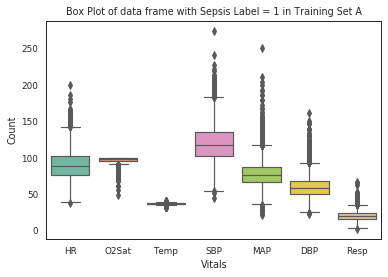

In [201]:
ax = sns.boxplot(data=A_box_1)
ax.set_title('Box Plot of data frame with Sepsis Label = 1 in Training Set A')
ax.set_xlabel('Vitals')
ax.set_ylabel('Count')

## KDE Plot for Vital signs

Text(0.5, 1.0, 'KDE Plot for Vital signs in Training Set A')

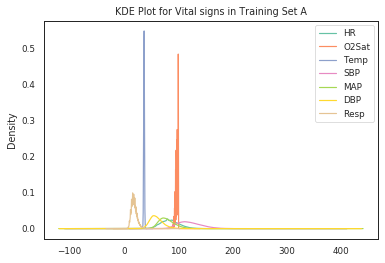

In [245]:
s = box_df_1.copy()
ax = s.plot.kde()
ax.set_title('KDE Plot for Vital signs in Training Set A')

## Bar Graph of Gender

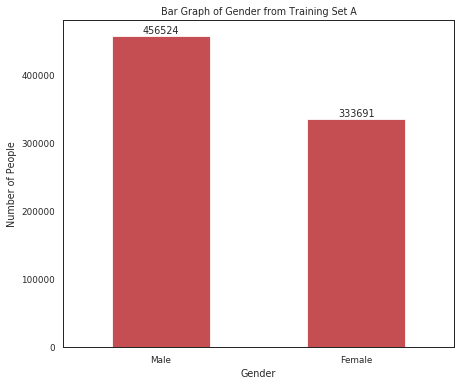

In [124]:
gender_A = df_1['Gender'].value_counts()
plt.figure(figsize=(7, 6))
ax = gender_A.plot(kind='bar', rot=0, color="r")
ax.set_title("Bar Graph of Gender from Training Set A", y = 1)
ax.set_xlabel('Gender')
ax.set_ylabel('Number of People')
ax.set_xticklabels(('Male', 'Female'))

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')    
plt.show()

## To check the Sepsis count Age-wise

In [35]:
age_df_1 = df_1.copy()

In [36]:
age_df_1['AgeCat']=''
age_df_1.loc[(age_df_1['Age'] > 10) & (age_df_1['Age'] <= 20), 'AgeCat'] = '10-20'
age_df_1.loc[(age_df_1['Age'] > 20) & (age_df_1['Age'] <= 30), 'AgeCat'] = '20-30'
age_df_1.loc[(age_df_1['Age'] > 30) & (age_df_1['Age'] <= 40), 'AgeCat'] = '30-40'
age_df_1.loc[(age_df_1['Age'] > 40) & (age_df_1['Age'] <= 50), 'AgeCat'] = '40-50'
age_df_1.loc[(age_df_1['Age'] > 50) & (age_df_1['Age'] <= 60), 'AgeCat'] = '50-60'
age_df_1.loc[(age_df_1['Age'] > 60) & (age_df_1['Age'] <= 70), 'AgeCat'] = '60-70'
age_df_1.loc[(age_df_1['Age'] > 70) & (age_df_1['Age'] <= 80), 'AgeCat'] = '70-80'
age_df_1.loc[age_df_1['Age'] > 80,'AgeCat'] = '80-100'

In [37]:
age_df_1.head()

,HR,O2Sat,Temp,SBP,DBP,Resp,Age,Gender,ICULOS,SepsisLabel,Patient_ID,AgeCat
0,76.9,97.3,36.24,117.5,73.7,54.0,19,83,0,1,0,10-20
1,97.0,95.0,36.30,98.0,75.3,64.0,19,83,0,2,0,10-20
2,89.0,99.0,36.57,122.0,86.0,68.0,22,83,0,3,0,20-30
3,90.0,95.0,36.70,104.7,66.2,47.8,30,83,0,4,0,20-30
4,103.0,88.5,36.16,122.0,91.3,76.0,24,83,0,5,0,20-30


In [38]:
age_df_1['AgeCat'].value_counts()

10-20    525751
20-30    219245
          24561
30-40     19101
40-50      1352
50-60       167
60-70        38
Name: AgeCat, dtype: int64

#### Plotting

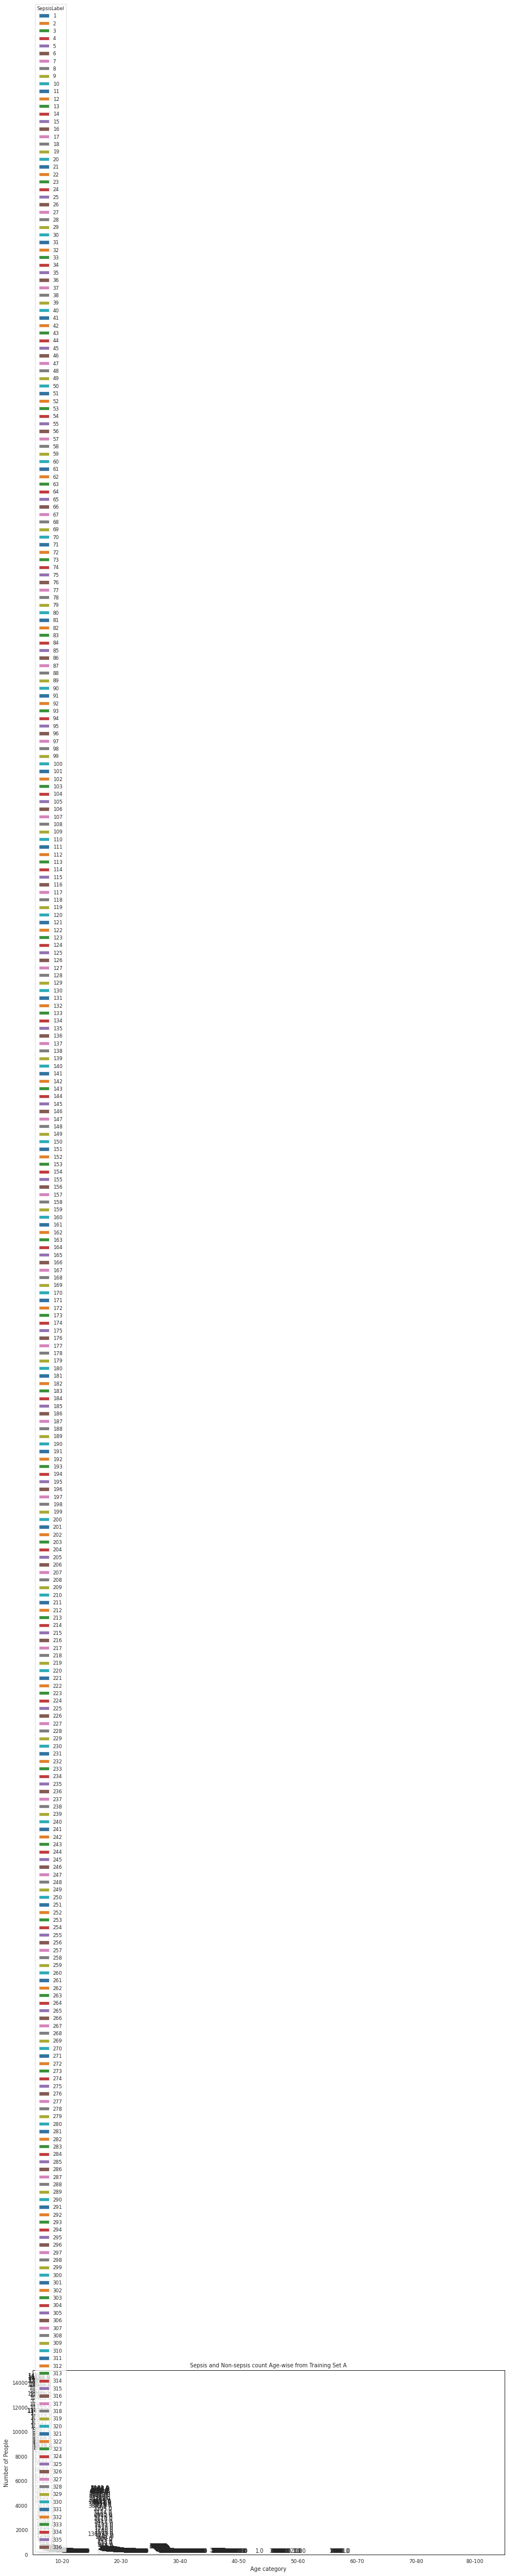

In [39]:
plt.subplots(figsize=(15,6))
ax = sns.countplot(x='AgeCat', order=['10-20', '20-30','30-40' ,'40-50','50-60','60-70', '70-80', '80-100'], hue='SepsisLabel', data=age_df_1, palette="tab10")
ax.set_title("Sepsis and Non-sepsis count Age-wise from Training Set A", y = 1)
ax.set_ylabel('Number of People')
ax.set_xlabel('Age category')
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom') 

## To check the count of Sepsis and Non-sepsis patients

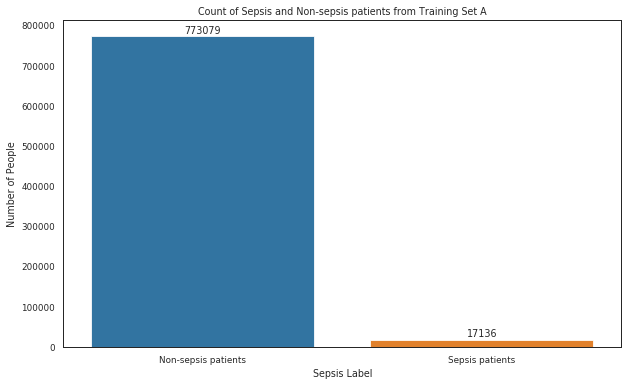

In [ ]:
plt.figure(figsize=(10,6));
ax = sns.countplot(data=df_1, x='SepsisLabel', palette="tab10")
ax.set_xticklabels(('Non-sepsis patients', 'Sepsis patients'))
ax.set_title("Count of Sepsis and Non-sepsis patients from Training Set A", y = 1)
ax.set_ylabel('Number of People')
ax.set_xlabel('Sepsis Label')
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom') 

---------------------------------------------------------------------------------------------------------------------

# Training Set B

In [46]:
df2.head(5)

,HR,O2Sat,Temp,SBP,DBP,Resp,Age,Gender,ICULOS,SepsisLabel,Patient_ID
0,76.4,96.1,36.50,147.7,104.2,78.4,21,73,1,1,0
1,93.0,92.5,36.62,110.0,76.0,56.0,22,73,1,2,0
2,91.0,96.0,36.37,108.0,84.5,72.0,23,73,1,3,0
3,93.0,98.0,36.88,123.0,87.0,61.0,21,73,1,4,0
4,93.0,95.0,36.79,110.0,81.0,70.0,20,73,1,5,0


### To check the data types

In [ ]:
df2.dtypes

HR                  float64
O2Sat               float64
Temp                float64
SBP                 float64
MAP                 float64
DBP                 float64
Resp                float64
EtCO2               float64
BaseExcess          float64
HCO3                float64
FiO2                float64
pH                  float64
PaCO2               float64
SaO2                float64
AST                 float64
BUN                 float64
Alkalinephos        float64
Calcium             float64
Chloride            float64
Creatinine          float64
Bilirubin_direct    float64
Glucose             float64
Lactate             float64
Magnesium           float64
Phosphate           float64
Potassium           float64
Bilirubin_total     float64
TroponinI           float64
Hct                 float64
Hgb                 float64
PTT                 float64
WBC                 float64
Fibrinogen          float64
Platelets           float64
Age                   int64
Gender              

### To check complete info of dataframe

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761995 entries, 0 to 761994
Data columns (total 42 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HR                669785 non-null  float64
 1   O2Sat             654338 non-null  float64
 2   Temp              258325 non-null  float64
 3   SBP               655931 non-null  float64
 4   MAP               649583 non-null  float64
 5   DBP               655738 non-null  float64
 6   Resp              600918 non-null  float64
 7   EtCO2             57636 non-null   float64
 8   BaseExcess        1764 non-null    float64
 9   HCO3              1411 non-null    float64
 10  FiO2              17210 non-null   float64
 11  pH                16958 non-null   float64
 12  PaCO2             17013 non-null   float64
 13  SaO2              14401 non-null   float64
 14  AST               13363 non-null   float64
 15  BUN               42092 non-null   float64
 16  Alkalinephos      13

### To check basic statistical details

In [ ]:
df2.describe()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Patient_iD
count,669785.000000,654338.000000,258325.000000,655931.000000,649583.000000,655738.000000,600918.000000,57636.000000,1764.000000,1411.000000,17210.000000,16958.000000,17013.000000,14401.000000,13363.000000,42092.000000,13409.000000,52013.000000,4689.000000,42129.000000,1808.000000,168860.000000,14303.000000,36470.000000,22405.000000,58689.000000,13448.000000,13816.000000,44375.000000,44770.000000,7393.000000,40099.000000,4212.000000,40710.000000,761995.000000,761995.000000,536200.000000,536200.000000,761995.000000,761995.000000,761995.000000,761995.000000
mean,84.141905,97.117749,36.926076,126.598433,86.367137,66.234002,18.670780,32.957657,-2.669218,23.219064,0.741160,7.371941,40.434274,96.566468,175.322345,23.254858,92.404542,6.983445,106.709533,1.643156,1.000647,138.834415,2.983441,2.069061,3.465291,4.097532,1.695761,8.220387,31.044062,10.195036,43.558968,10.720893,280.419516,191.454864,60.964853,0.540133,0.488637,0.511363,-60.376261,26.783929,0.014147,30360.317577
std,17.724160,2.964618,0.755826,24.533018,16.774449,14.237016,4.720294,7.951662,4.185396,3.259499,30.492778,0.087226,10.275617,3.729406,658.974827,19.728496,89.132038,3.020360,4.887927,2.093640,2.605068,51.056803,2.833047,0.410227,1.379109,0.653848,3.429131,25.478795,6.594169,2.252608,35.594285,7.918227,144.296293,95.879617,16.579604,0.498387,0.499871,0.499871,168.524627,29.825131,0.118097,5776.257876
min,20.000000,20.000000,30.000000,20.000000,30.000000,20.000000,1.000000,10.000000,-23.200000,7.700000,-50.000000,6.710000,12.000000,23.000000,5.000000,1.000000,11.000000,1.000000,74.000000,0.200000,0.010000,13.000000,0.400000,0.500000,0.600000,1.300000,0.100000,0.010000,9.100000,2.300000,20.000000,0.100000,35.000000,1.000000,14.000000,0.000000,0.000000,0.000000,-5366.860000,1.000000,0.000000,20336.000000
25%,71.500000,96.000000,36.500000,109.000000,74.500000,56.000000,16.000000,28.000000,-4.900000,21.450000,0.400000,7.320000,34.700000,95.700000,20.000000,11.000000,52.000000,7.200000,104.000000,0.750000,0.100000,108.000000,1.330000,1.800000,2.600000,3.700000,0.600000,0.030000,26.000000,8.500000,28.500000,7.000000,183.000000,126.000000,50.000000,0.000000,0.000000,0.000000,-56.160000,10.000000,0.000000,25382.000000
50%,83.000000,98.000000,36.900000,124.000000,84.000000,65.000000,18.000000,33.000000,-2.400000,23.400000,0.400000,7.380000,39.000000,97.500000,32.000000,17.000000,70.000000,8.200000,107.000000,0.990000,0.200000,128.000000,1.970000,2.000000,3.300000,4.000000,0.800000,0.220000,30.500000,9.900000,32.300000,9.600000,251.000000,180.000000,63.000000,1.000000,0.000000,1.000000,-8.950000,20.000000,0.000000,30393.000000
75%,95.000000,99.500000,37.400000,142.000000,96.000000,74.000000,21.000000,38.000000,-0.200000,25.100000,0.600000,7.430000,44.000000,98.700000,72.000000,28.000000,101.000000,8.700000,110.000000,1.510000,0.682500,155.000000,3.430000,2.200000,4.000000,4.400000,1.400000,3.112500,35.700000,11.700000,42.000000,12.800000,341.000000,240.000000,72.000000,1.000000,1.000000,1.000000,-3.100000,34.000000,0.000000,35338.000000
max,211.000000,100.000000,50.000000,300.000000,300.000000,300.000000,100.000000,100.000000,14.200000,36.400000,4000.000000,7.710000,100.000000,100.000000,9961.000000,268.000000,1650.000000,27.900000,124.000000,41.900000,30.000000,891.000000,22.250000,9.800000,15.500000,15.800000,49.600000,440.000000,70.200000,30.000000,250.000000,440.000000,1179.000000,2322.000000,100.000000,1.000000,1.000000,1.000000,0.000000,336.000000,1.000000,40335.000000


### To check total null values in dataframe columns (In Descending Order)

In [ ]:
df2.isnull().sum().sort_values(ascending = False)

HCO3                760584
BaseExcess          760231
Bilirubin_direct    760187
Fibrinogen          757783
Chloride            757306
PTT                 754602
AST                 748632
Alkalinephos        748586
Bilirubin_total     748547
TroponinI           748179
Lactate             747692
SaO2                747594
pH                  745037
PaCO2               744982
FiO2                744785
Phosphate           739590
Magnesium           725525
WBC                 721896
Platelets           721285
BUN                 719903
Creatinine          719866
Hct                 717620
Hgb                 717225
Calcium             709982
EtCO2               704359
Potassium           703306
Glucose             593135
Temp                503670
Unit1               225795
Unit2               225795
Resp                161077
MAP                 112412
O2Sat               107657
DBP                 106257
SBP                 106064
HR                   92210
SepsisLabel              0
A

### Visualizing Missing values using Heat Map

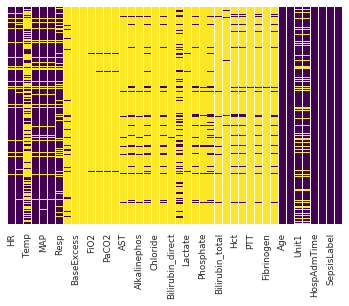

In [ ]:
ax = sns.heatmap(df2.isnull(), cbar = False,  yticklabels = False, cmap = 'viridis')

### To calculate percentage of Null values in each column of dataframe

In [ ]:
per_B = df2.isna().mean().round(4) * 100

In [ ]:
per_B

HR                  12.10
O2Sat               14.13
Temp                66.10
SBP                 13.92
MAP                 14.75
DBP                 13.94
Resp                21.14
EtCO2               92.44
BaseExcess          99.77
HCO3                99.81
FiO2                97.74
pH                  97.77
PaCO2               97.77
SaO2                98.11
AST                 98.25
BUN                 94.48
Alkalinephos        98.24
Calcium             93.17
Chloride            99.38
Creatinine          94.47
Bilirubin_direct    99.76
Glucose             77.84
Lactate             98.12
Magnesium           95.21
Phosphate           97.06
Potassium           92.30
Bilirubin_total     98.24
TroponinI           98.19
Hct                 94.18
Hgb                 94.12
PTT                 99.03
WBC                 94.74
Fibrinogen          99.45
Platelets           94.66
Age                  0.00
Gender               0.00
Unit1               29.63
Unit2               29.63
HospAdmTime 

### To delete those columns having NaN percentage greater than 70%

In [ ]:
for k, v in per_B.items():
    if v >= 70:
        del per_B[k]

In [ ]:
per_B

HR             12.10
O2Sat          14.13
Temp           66.10
SBP            13.92
MAP            14.75
DBP            13.94
Resp           21.14
Age             0.00
Gender          0.00
Unit1          29.63
Unit2          29.63
HospAdmTime     0.00
ICULOS          0.00
SepsisLabel     0.00
Patient_iD      0.00
dtype: float64

### Also, we don't want Unit1, Unit2, and HospAdmTime. So, we will remove them.

In [ ]:
del per_B['Unit1']
del per_B['Unit2']
del per_B['HospAdmTime']

In [ ]:
per_B

HR             12.10
O2Sat          14.13
Temp           66.10
SBP            13.92
MAP            14.75
DBP            13.94
Resp           21.14
Age             0.00
Gender          0.00
ICULOS          0.00
SepsisLabel     0.00
Patient_iD      0.00
dtype: float64

### Graphical representation of NaN percentage (where NaN % > 0)

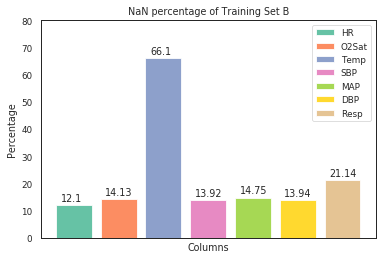

In [ ]:
f, ax = plt.subplots()
for i,item in enumerate(zip(per_B.keys(), per_B.values)):
    if (item[1] > 0):
        ax.bar(item[0], item[1], label = item[0])
        ax.text(i - 0.30, item[1] + 1.5 , str(np.round(item[1],2)))    
ax.set_xticklabels([]) 
ax.set_xticks([]) 
plt.title('NaN percentage of Training Set B')
plt.ylim(0,80)
plt.ylabel('Percentage')
plt.xlabel('Columns')
plt.legend(loc='best')
plt.show()

### Creating new dataframe with desired columns | Alternate way of dropping columns

In [61]:
df_2 = df2.copy()

In [ ]:
print('There are {} rows and {} columns in New Dataframe'.format(df_2.shape[0], df_2.shape[1]))

There are 761995 rows and 12 columns in New Dataframe


In [62]:
df_2.tail(5)

,HR,O2Sat,Temp,SBP,DBP,Resp,Age,Gender,ICULOS,SepsisLabel,Patient_ID
761990,80.0,96.0,36.78,115.0,87.0,65.0,15,62,0,31,0
761991,74.0,97.0,36.85,114.0,83.0,67.0,15,62,0,32,0
761992,78.0,98.0,37.00,110.0,83.0,69.0,15,62,0,33,0
761993,82.0,99.0,36.60,124.0,91.0,71.0,16,62,0,34,0
761994,80.0,97.0,36.78,121.0,97.0,73.0,15,62,0,35,0


### Check Correlation between columns

Text(0.5, 1.0, 'Correlation after NaN values imputation in Training Set B')

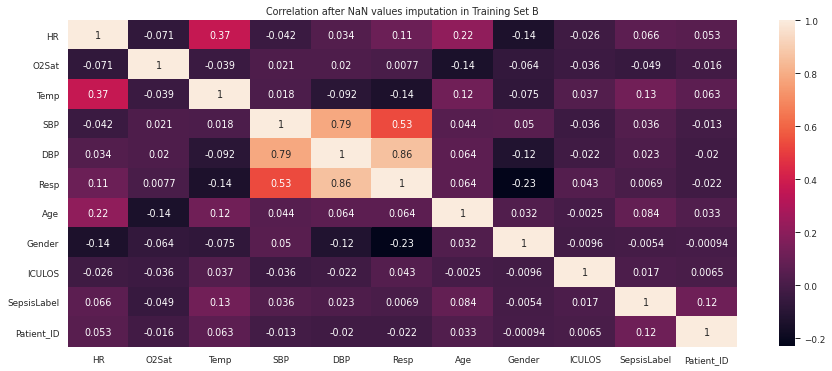

In [49]:
corr = df_2.corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr, annot=True)
plt.title('Correlation after NaN values imputation in Training Set B')

## To check outliers in the vital signs

In [65]:
box_df_2 = df_2[['HR', 'O2Sat', 'Temp', 'SBP', 'DBP', 'Resp']].copy()

In [66]:
box_df_2.head()

,HR,O2Sat,Temp,SBP,DBP,Resp
0,76.4,96.1,36.50,147.7,104.2,78.4
1,93.0,92.5,36.62,110.0,76.0,56.0
2,91.0,96.0,36.37,108.0,84.5,72.0
3,93.0,98.0,36.88,123.0,87.0,61.0
4,93.0,95.0,36.79,110.0,81.0,70.0


### 1. Using Interactive Box Plot

In [ ]:
fig = go.Figure()

for col in box_df_2:
  fig.add_trace(go.Box(y=box_df_2[col].values, name=box_df_2[col].name))

fig.update_layout(
    title={
        'text': "Boxplot of Training Set B",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    xaxis_title="Vitals", yaxis_title="Count", legend_title="Columns")  

fig.write_html('Box_B.html', auto_open=True)

In [ ]:
# Uncomment to show the graph within notebook
# HTML(filename='Box_B.html')

### 2. Using Box Plot

Text(0, 0.5, 'Count')

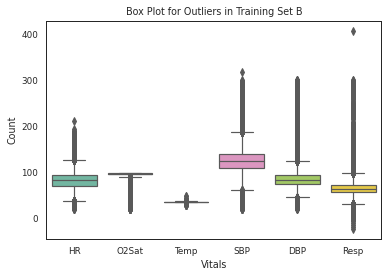

In [67]:
ax = sns.boxplot(data=box_df_2)
ax.set_title('Box Plot for Outliers in Training Set B')
ax.set_xlabel('Vitals')
ax.set_ylabel('Count')

### 3. Using Boxenplot 

Text(0, 0.5, 'Count')

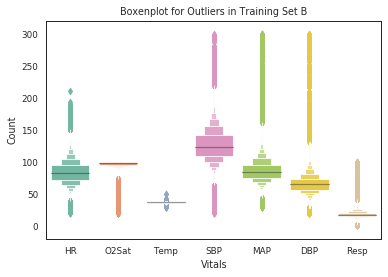

In [ ]:
ax = sns.boxenplot(data=box_df_2)
ax.set_title('Boxenplot for Outliers in Training Set B')
ax.set_xlabel('Vitals')
ax.set_ylabel('Count')

### 4. Box Plots based on Sepsis Label 0 and 1 in Training Set B

In [204]:
B_box_0 = df_2.loc[df_2['SepsisLabel']==0]

In [205]:
B_box_0.head(5)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,ICULOS,SepsisLabel,Patient_iD
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73,1,1,0,20336
1,93.0,92.5,NaN,110.0,76.0,56.0,22.0,73,1,2,0,20336
2,91.0,96.0,NaN,108.0,84.5,72.0,23.5,73,1,3,0,20336
3,93.0,98.0,NaN,123.0,87.0,61.0,21.0,73,1,4,0,20336
4,93.0,95.0,NaN,110.0,81.0,70.0,20.0,73,1,5,0,20336


In [207]:
# As the data frame is created only for those entries where sepsis label = 0,
# so, we don't need SepsisLabel colomn in box plot. Also we will focus only on 
# vitals sign for now. So, we'll drop the rest columns.

In [209]:
B_box_0.drop(['Age', 'Gender', 'ICULOS', 'SepsisLabel', 'Patient_iD'], axis=1, inplace=True)

In [210]:
B_box_0.head(5)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93.0,92.5,NaN,110.0,76.0,56.0,22.0
2,91.0,96.0,NaN,108.0,84.5,72.0,23.5
3,93.0,98.0,NaN,123.0,87.0,61.0,21.0
4,93.0,95.0,NaN,110.0,81.0,70.0,20.0


#### Plotting

Text(0, 0.5, 'Count')

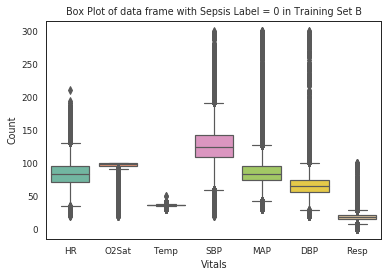

In [211]:
ax = sns.boxplot(data=B_box_0)
ax.set_title('Box Plot of data frame with Sepsis Label = 0 in Training Set B')
ax.set_xlabel('Vitals')
ax.set_ylabel('Count')

In [212]:
B_box_1 = df_2.loc[df_2['SepsisLabel']==1]

In [213]:
B_box_1.head(5)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,ICULOS,SepsisLabel,Patient_iD
556,101.0,97.0,37.9,106.0,80.0,64.0,NaN,89,1,81,1,20348
557,109.0,97.0,37.8,114.0,86.0,67.0,NaN,89,1,82,1,20348
558,100.0,97.0,37.8,106.0,72.0,59.0,NaN,89,1,83,1,20348
559,104.0,98.0,37.7,108.0,81.0,65.0,16.0,89,1,84,1,20348
560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89,1,85,1,20348


In [214]:
# As the data frame is created only for those entries where sepsis label = 1,
# so, we don't need SepsisLabel colomn in box plot. Also we will focus only on 
# vitals sign for now. So, we'll drop the rest columns.

In [215]:
B_box_1.drop(['Age', 'Gender', 'ICULOS', 'SepsisLabel', 'Patient_iD'], axis=1, inplace=True)

In [216]:
B_box_1.head(5)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp
556,101.0,97.0,37.9,106.0,80.0,64.0,NaN
557,109.0,97.0,37.8,114.0,86.0,67.0,NaN
558,100.0,97.0,37.8,106.0,72.0,59.0,NaN
559,104.0,98.0,37.7,108.0,81.0,65.0,16.0
560,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Plotting

Text(0, 0.5, 'Count')

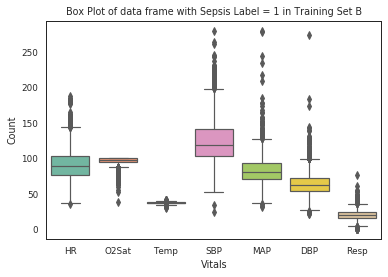

In [217]:
ax = sns.boxplot(data=B_box_1)
ax.set_title('Box Plot of data frame with Sepsis Label = 1 in Training Set B')
ax.set_xlabel('Vitals')
ax.set_ylabel('Count')

## KDE Plot for Vital signs

In [ ]:
s = box_df_2.copy()
ax = s.plot.kde()
ax.set_title('KDE Plot for Vital signs in Training Set B')

## Bar Graph of Gender

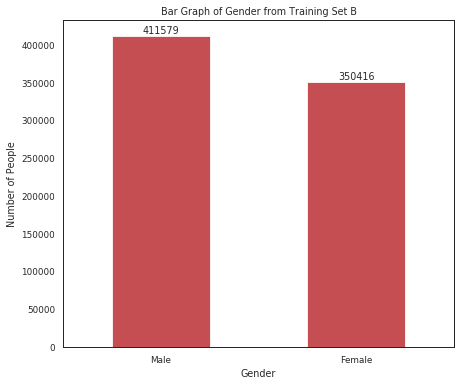

In [ ]:
gender_B = df_2['Gender'].value_counts()
plt.figure(figsize=(7, 6))
ax = gender_B.plot(kind='bar', rot=0, color="r")
ax.set_title("Bar Graph of Gender from Training Set B", y = 1)
ax.set_xlabel('Gender')
ax.set_ylabel('Number of People')
ax.set_xticklabels(('Male', 'Female'))

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')    
plt.show()

## To check the Sepsis count Age-wise

In [203]:
age_df_2 = df_2.copy()

In [ ]:
age_df_2['AgeCat']=''
age_df_2.loc[(age_df_2['Age'] > 10) & (age_df_2['Age'] <= 20), 'AgeCat'] = '10-20'
age_df_2.loc[(age_df_2['Age'] > 20) & (age_df_2['Age'] <= 30), 'AgeCat'] = '20-30'
age_df_2.loc[(age_df_2['Age'] > 30) & (age_df_2['Age'] <= 40), 'AgeCat'] = '30-40'
age_df_2.loc[(age_df_2['Age'] > 40) & (age_df_2['Age'] <= 50), 'AgeCat'] = '40-50'
age_df_2.loc[(age_df_2['Age'] > 50) & (age_df_2['Age'] <= 60), 'AgeCat'] = '50-60'
age_df_2.loc[(age_df_2['Age'] > 60) & (age_df_2['Age'] <= 70), 'AgeCat'] = '60-70'
age_df_2.loc[(age_df_2['Age'] > 70) & (age_df_2['Age'] <= 80), 'AgeCat'] = '70-80'
age_df_2.loc[age_df_2['Age'] > 80,'AgeCat'] = '80-100'

In [ ]:
age_df_2.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,Age,Gender,ICULOS,SepsisLabel,Patient_iD,AgeCat
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73,1,1,0,20336,70-80
1,93.0,92.5,NaN,110.0,76.0,56.0,22.0,73,1,2,0,20336,70-80
2,91.0,96.0,NaN,108.0,84.5,72.0,23.5,73,1,3,0,20336,70-80
3,93.0,98.0,NaN,123.0,87.0,61.0,21.0,73,1,4,0,20336,70-80
4,93.0,95.0,NaN,110.0,81.0,70.0,20.0,73,1,5,0,20336,70-80


In [ ]:
age_df_2['AgeCat'].value_counts()

60-70     193143
50-60     150347
70-80     147754
40-50      99005
80-100     79412
30-40      51810
20-30      34173
10-20       6351
Name: AgeCat, dtype: int64

#### Plotting

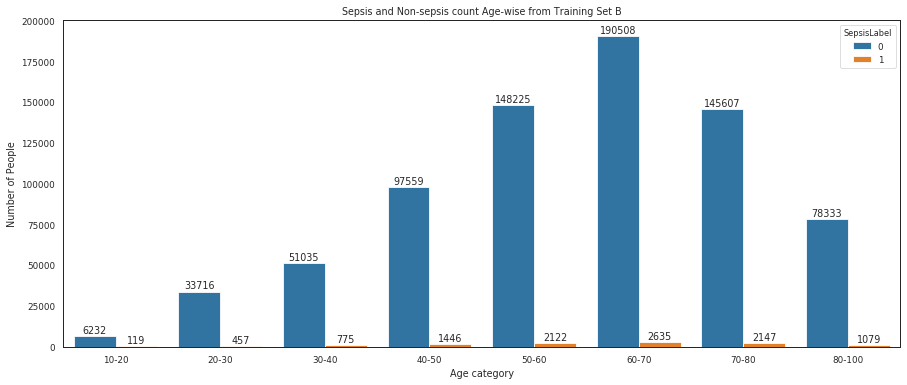

In [ ]:
plt.subplots(figsize=(15,6))
ax = sns.countplot(x='AgeCat', order=['10-20', '20-30','30-40' ,'40-50','50-60','60-70', '70-80', '80-100'], hue='SepsisLabel', data=age_df_2, palette="tab10")
ax.set_title("Sepsis and Non-sepsis count Age-wise from Training Set B", y = 1)
ax.set_ylabel('Number of People')
ax.set_xlabel('Age category')
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom') 

## To check the count of Sepsis and Non-sepsis patients

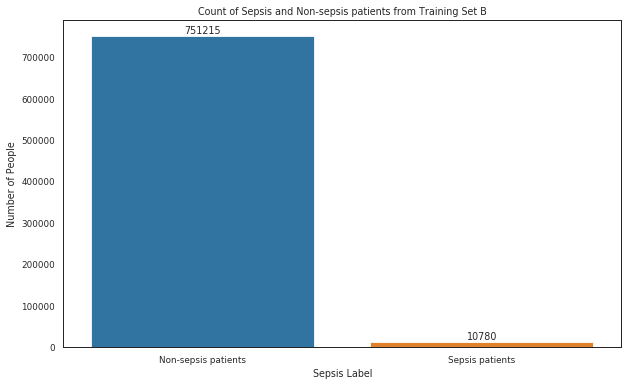

In [ ]:
plt.figure(figsize=(10,6));
ax = sns.countplot(data=df_2, x='SepsisLabel', palette="tab10")
ax.set_xticklabels(('Non-sepsis patients', 'Sepsis patients'))
ax.set_title("Count of Sepsis and Non-sepsis patients from Training Set B", y = 1)
ax.set_ylabel('Number of People')
ax.set_xlabel('Sepsis Label')
for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom') 

#### Concatenating Training Set A and B to make Box plot

In [220]:
con_df = pd.concat([df_1, df_2])

In [85]:
# Making new copy of the data frame for dropping unwanted columns to plot box plot

In [223]:
concat_df = con_df.copy()

In [224]:
concat_df.drop(['Age', 'Gender', 'ICULOS', 'SepsisLabel', 'Patient_iD'], axis=1, inplace=True)

In [225]:
concat_df.shape

(1552210, 7)

Text(0, 0.5, 'Count')

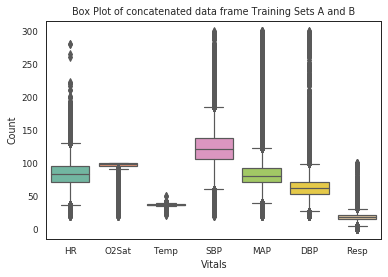

In [226]:
ax = sns.boxplot(data=concat_df)
ax.set_title('Box Plot of concatenated data frame Training Sets A and B')
ax.set_xlabel('Vitals')
ax.set_ylabel('Count')

#### Seperate Box plots for sepsis label 0 and 1 in concatenated data frame

In [227]:
con_0 = con_df.loc[con_df['SepsisLabel']==0]

In [228]:
con_0.shape

(1524294, 12)

In [231]:
# Dropping unwanted columns

In [232]:
con_0.drop(['Age', 'Gender', 'ICULOS', 'SepsisLabel', 'Patient_iD'], axis=1, inplace=True)

In [233]:
con_0.shape

(1524294, 7)

#### Plotting

Text(0, 0.5, 'Count')

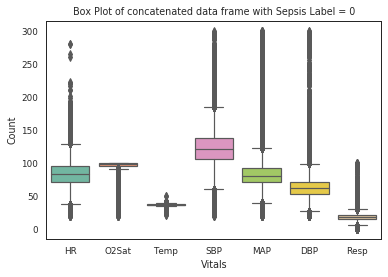

In [234]:
ax = sns.boxplot(data=con_0)
ax.set_title('Box Plot of concatenated data frame with Sepsis Label = 0')
ax.set_xlabel('Vitals')
ax.set_ylabel('Count')

In [235]:
con_1 = con_df.loc[con_df['SepsisLabel']==1]

In [236]:
con_1.shape

(27916, 12)

In [237]:
# Dropping unwanted columns

In [238]:
con_1.drop(['Age', 'Gender', 'ICULOS', 'SepsisLabel', 'Patient_iD'], axis=1, inplace=True)

In [239]:
con_1.shape

(27916, 7)

#### Plotting

Text(0, 0.5, 'Count')

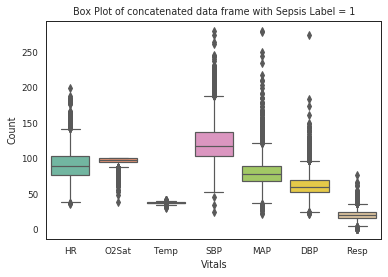

In [240]:
ax = sns.boxplot(data=con_1)
ax.set_title('Box Plot of concatenated data frame with Sepsis Label = 1')
ax.set_xlabel('Vitals')
ax.set_ylabel('Count')